In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from datetime import date, datetime, timedelta

In [2]:
path_earning_call_presentation_all_sentiment=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_presentation_all_sentiment.csv'
path_tesla_impliedborrowfee=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_impliedborrowfee.csv'

In [3]:
data_call_presentation_all=pd.read_csv(path_earning_call_presentation_all_sentiment)
data_call_presentation_all['call_datetime']=\
pd.to_datetime(data_call_presentation_all['call_datetime'], format='%Y-%m-%d')
data_call_presentation_all=data_call_presentation_all.sort_values('call_datetime')

In [4]:
data_call_presentation_all['call_datetime'].min(),\
data_call_presentation_all['call_datetime'].max()

(Timestamp('2010-11-09 00:00:00'), Timestamp('2023-10-18 00:00:00'))

In [5]:
data_call_presentation_all=\
data_call_presentation_all[(data_call_presentation_all['call_datetime'] >= datetime(2010, 11, 9))&\
                           (data_call_presentation_all['call_datetime'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [6]:
impliedborrowfee=pd.read_csv(path_tesla_impliedborrowfee)
impliedborrowfee['date']=\
pd.to_datetime(impliedborrowfee['date'], format='%Y-%m-%d')
impliedborrowfee=impliedborrowfee.sort_values('date')

In [7]:
impliedborrowfee=\
impliedborrowfee[(impliedborrowfee['date'] >= datetime(2010, 11, 9))&\
                 (impliedborrowfee['date'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [8]:
impliedborrowfee.columns

Index(['date', 'days', 'delta_call', 'impl_volatility_call', 'delta_put',
       'impl_volatility_put', 'impliedfee', 'impliedfeefivedaymoving'],
      dtype='object')

In [9]:
impliedborrowfee

,date,days,delta_call,impl_volatility_call,delta_put,impl_volatility_put,impliedfee,impliedfeefivedaymoving
0,2010-11-09,30,50,0.488466,-50,0.747213,36.005695,39.794999
1,2010-11-10,30,50,0.486275,-50,0.781504,41.082313,39.161625
2,2010-11-11,30,50,0.527946,-50,0.733993,28.672276,38.094397
3,2010-11-12,30,50,0.557881,-50,0.802888,34.093718,36.616720
4,2010-11-15,30,50,0.629934,-50,0.906521,38.488203,35.668441
...,...,...,...,...,...,...,...,...
3091,2023-02-22,30,50,0.711583,-50,0.705976,-0.780237,0.263725
3092,2023-02-23,30,50,0.677816,-50,0.670870,-0.966564,-0.204083
3093,2023-02-24,30,50,0.663831,-50,0.662809,-0.142215,-0.240514
3094,2023-02-27,30,50,0.663550,-50,0.661413,-0.297372,-0.657141


In [14]:
impliedborrowfee['impl_volatility_call'].mean()

0.5305476637596899

In [15]:
impliedborrowfee['impl_volatility_put'].mean()

0.5662492464470285

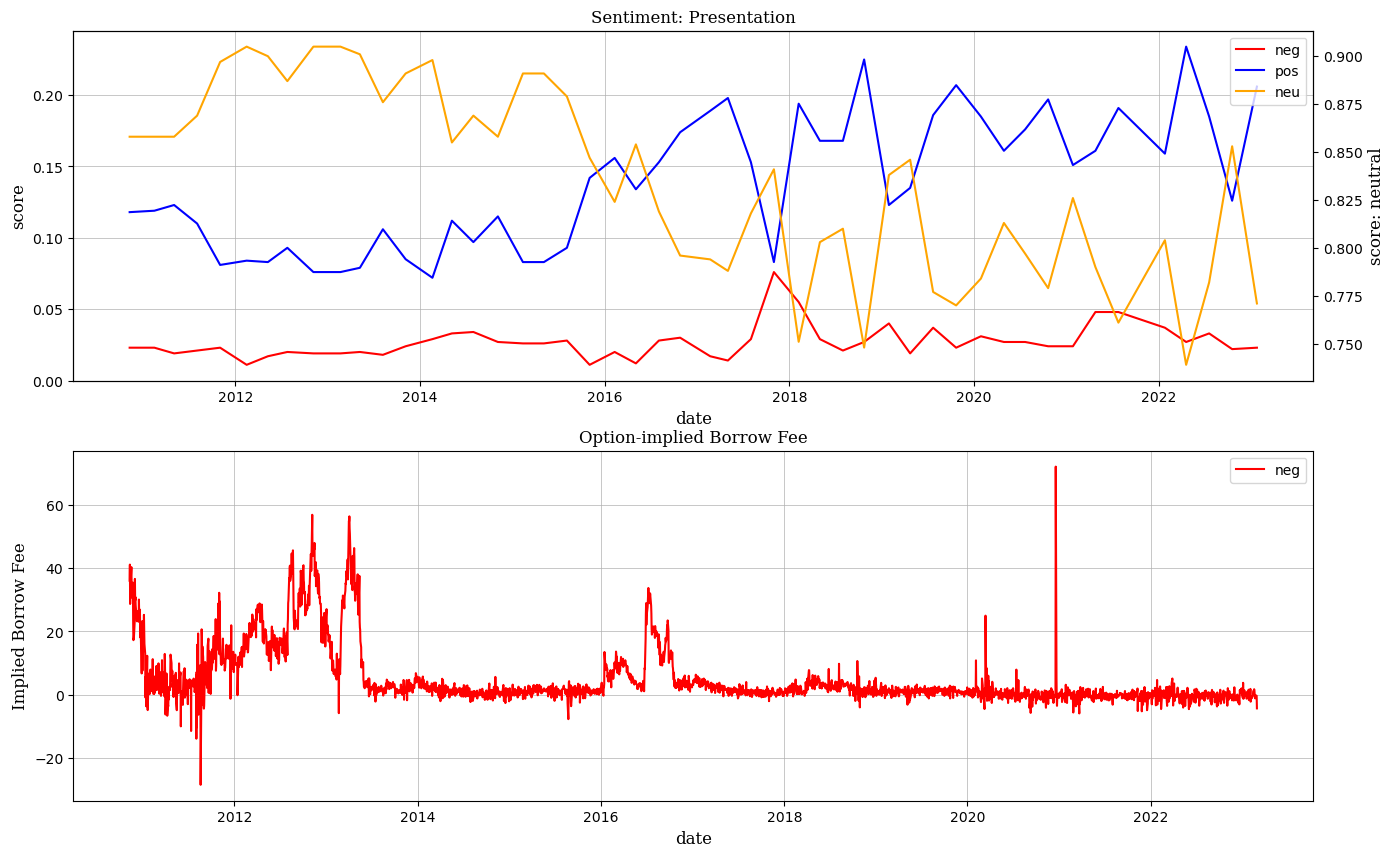

In [50]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2]) = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))

lns1=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Presentation", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_presentation_all['call_datetime'],\
               data_call_presentation_all['presentationa_neu'], label='neu', color='orange')
ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax2.plot(impliedborrowfee['date'],\
         impliedborrowfee['impliedfee'], label='Option-implied Borrow Fee', color='r')

ax2.set_title("Option-implied Borrow Fee", **csfont, size = sizetext)
ax2.set_ylabel('Implied Borrow Fee', size = sizetext, **csfont)
ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.grid(linewidth=0.5)
ax2.legend()

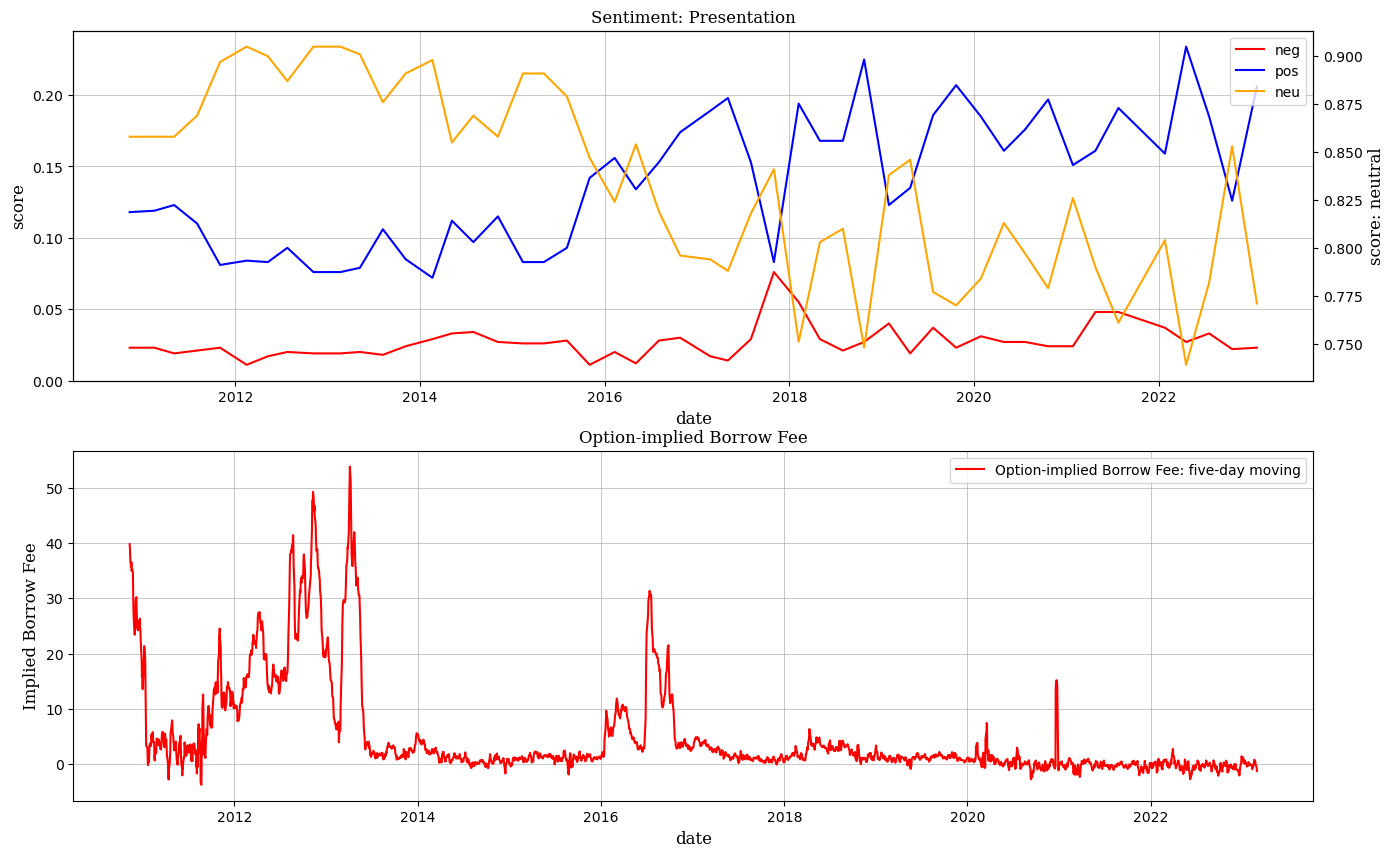

In [54]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2]) = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))

lns1=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Presentation", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_presentation_all['call_datetime'],\
               data_call_presentation_all['presentationa_neu'], label='neu', color='orange')
ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax2.plot(impliedborrowfee['date'],\
         impliedborrowfee['impliedfeefivedaymoving'], label='Option-implied Borrow Fee: five-day moving', color='r')

ax2.set_title("Option-implied Borrow Fee", **csfont, size = sizetext)
ax2.set_ylabel('Implied Borrow Fee', size = sizetext, **csfont)
ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.grid(linewidth=0.5)
ax2.legend()

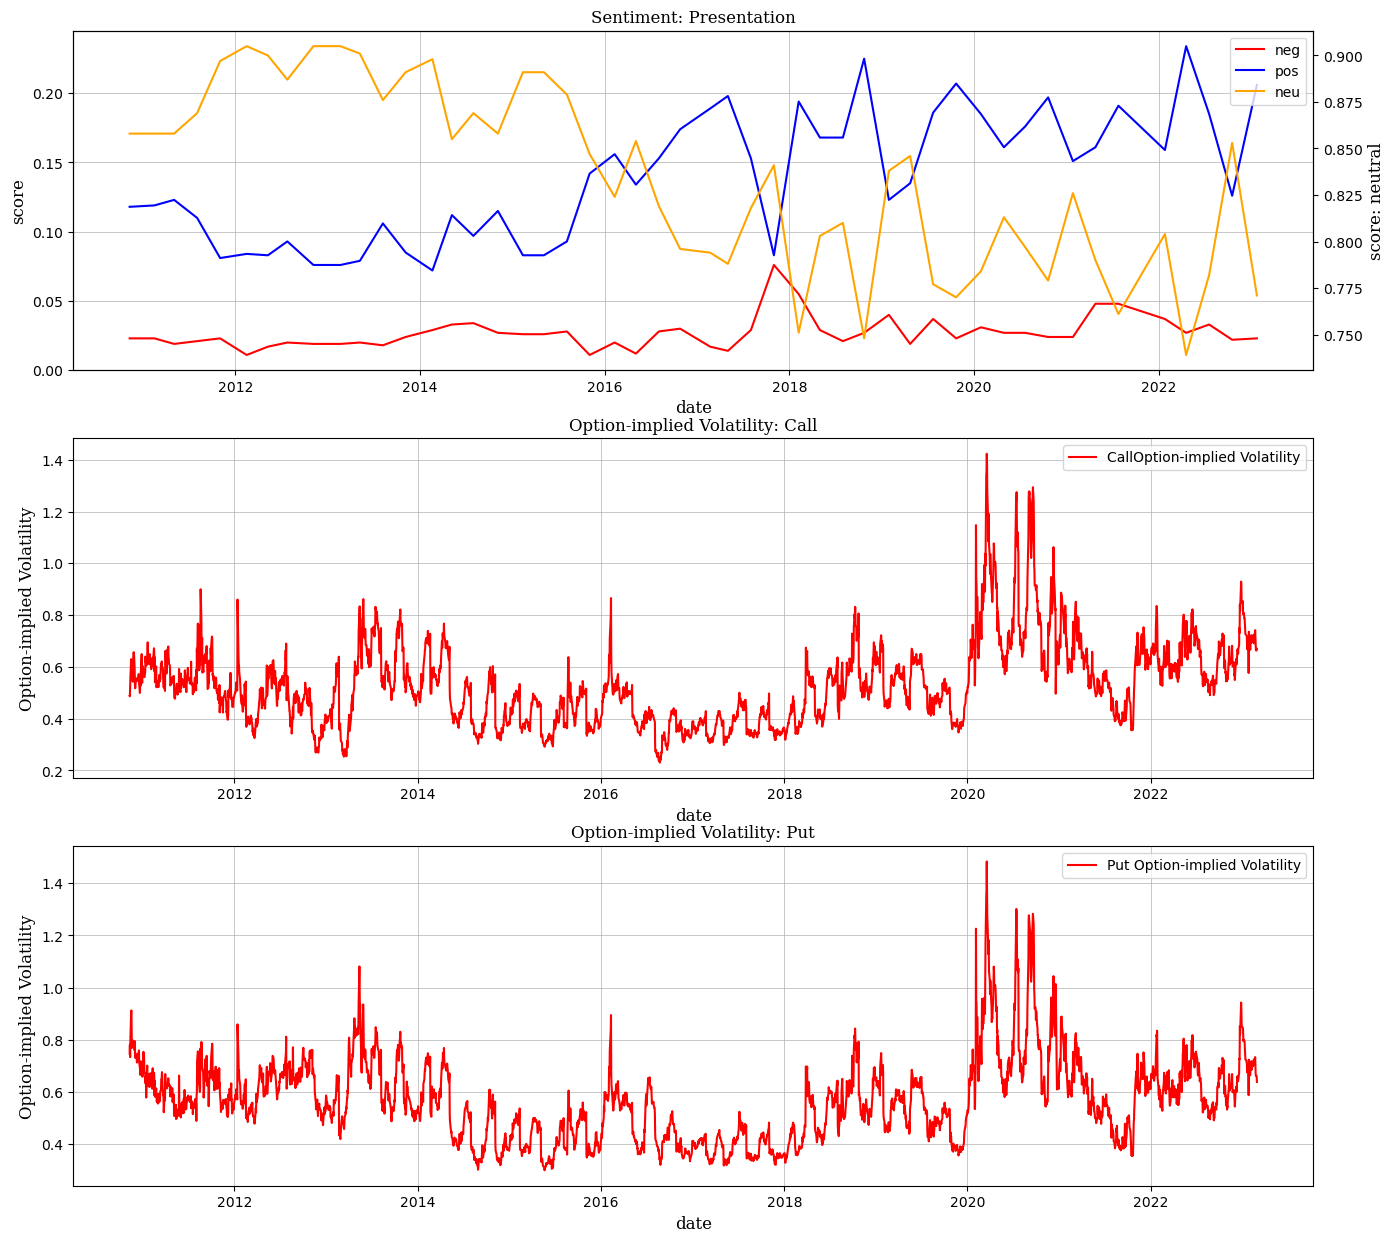

In [13]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2, ax3]) = plt.subplots(nrows = 3, ncols = 1, figsize = (16, 15))

lns1=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Presentation", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_presentation_all['call_datetime'],\
               data_call_presentation_all['presentationa_neu'], label='neu', color='orange')
ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax2.plot(impliedborrowfee['date'],\
         impliedborrowfee['impl_volatility_call'],
         label='CallOption-implied Volatility',
         color='r')

ax2.set_title("Option-implied Volatility: Call", **csfont, size = sizetext)
ax2.set_ylabel('Option-implied Volatility', size = sizetext, **csfont)
ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.grid(linewidth=0.5)
ax2.legend()


ax3.plot(impliedborrowfee['date'],\
         impliedborrowfee['impl_volatility_put'],
         label='Put Option-implied Volatility',
         color='r')

ax3.set_title("Option-implied Volatility: Put", **csfont, size = sizetext)
ax3.set_ylabel('Option-implied Volatility', size = sizetext, **csfont)
ax3.set_xlabel('date', size = sizetext, **csfont)
ax3.grid(linewidth=0.5)
ax3.legend()